<a href="https://colab.research.google.com/github/shubhamksingh1/TextClassification/blob/main/KTRAIN/BT_ModelNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Mounting Drive, Importing and Installing Packages***

### Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importing Packages

In [ ]:
!pip install ktrain

     |████████████████████████████████| 92kB 4.8MB/s 
     |████████████████████████████████| 6.7MB 17.4MB/s 
     |████████████████████████████████| 1.0MB 40.7MB/s 
     |████████████████████████████████| 245kB 41.2MB/s 
     |████████████████████████████████| 1.8MB 40.4MB/s 
  Created wheel for ktrain: filename=ktrain-0.7.3-cp36-none-any.whl size=113951 sha256=39fbab9453a20e2bababbab24f786a7b503c2248f7d1423b632659b41616e45c
  Stored in directory: /root/.cache/pip/wheels/86/20/70/000142264c6a768a4e8b67d8ef2ebc32c018684acb2eed7586
  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=3ffebcd248c8409efe2d7440739ced300dede404539c66bae2496499d5283617
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a30c8fd988bbb48f5ee21b0
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=595425cf3cb12ec3de31d5b37d180b7ba60386cdfefc9f59c82c4c1543888034
  Stored in directory: /root/.cache/

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
import ktrain
from ktrain import text
import nltk
from nltk.corpus import stopwords
from textblob import Word
%tensorflow_version 1.x

using Keras version: 2.2.4-tf


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
from statistics import *
from tabulate import tabulate

In [ ]:
 stop = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train_part = pd.read_csv("/content/drive/My Drive/BTClassText/train.csv")
val_part = pd.read_csv("/content/drive/My Drive/BTClassText/test.csv")

In [ ]:
train_part.shape,val_part.shape

((385, 3), (171, 3))

In [ ]:
def univariate_categorical(df,x):
       
    print('\nNumber of unique values => ' + str(len(df[x].unique())) + '\n\n')

    plt.figure(figsize=(10, 10))
    
    y = "count"
    plt.subplot(2, 1, 1)
    plt.xticks(rotation=90)

    sns.countplot(df[x])
    count_df = df[x].value_counts().rename(y).reset_index().rename(columns={"index":x})
    y = "percent(%)"
    percent_df = df[x].value_counts(normalize=True).rename(y).reset_index().rename(columns={"index":x})
    plt.subplot(2, 1, 2)
    sns.barplot(percent_df[x], percent_df[y], data=percent_df)
    plt.xticks(rotation=90)
    plt.show()
    print(tabulate(pd.merge(percent_df, count_df, how='inner'), headers='keys', tablefmt='fancy_grid'))


In [ ]:
train_part.describe()

,Notes,Keywords/Phrases,Category
count,385,385,385
unique,385,48,11
top,ends arrived at stcb ceased line returned to c...,gea service test completed and no fault found,fibre completed copper pending
freq,1,158,174



Number of unique values => 11




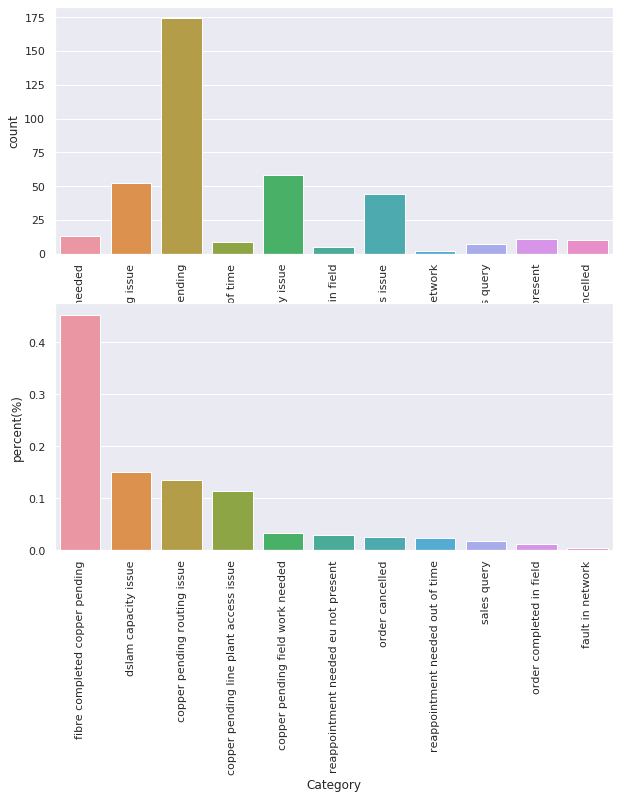

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ fibre completed copper pending         │   0.451948   │     174 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ dslam capacity issue                   │   0.150649   │      58 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │   0.135065   │      52 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │   0.114286   │      44 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  4 │ copper pending field work needed       │   0.0337662  │      13 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  5 │ reappointment needed eu not present    │   0

In [ ]:
univariate_categorical(train_part,'Category')

In [ ]:
val_part.describe()

,Notes,Keywords/Phrases,Category
count,171,171,171
unique,171,34,11
top,ends i cannot complete this task because the r...,gea service test completed and no fault found,fibre completed copper pending
freq,1,69,75



Number of unique values => 11




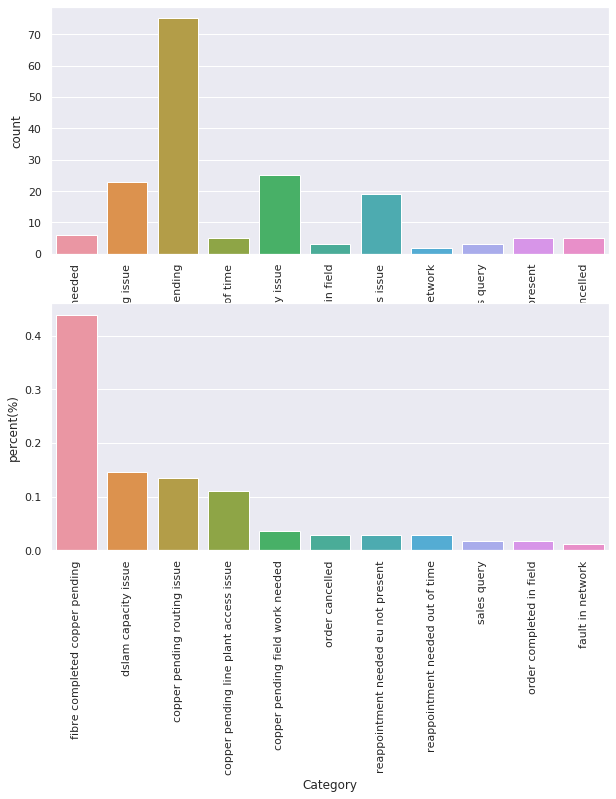

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ fibre completed copper pending         │    0.438596  │      75 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ dslam capacity issue                   │    0.146199  │      25 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │    0.134503  │      23 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │    0.111111  │      19 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  4 │ copper pending field work needed       │    0.0350877 │       6 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  5 │ order cancelled                        │    

In [ ]:
univariate_categorical(val_part,'Category')

### Dropping on category condition to balance the data

In [ ]:
drop_cat = ['copper pending field work needed','reappointment needed eu not present','order cancelled','reappointment needed out of time','sales query','order completed in field','fault in network']

In [ ]:
drop_cat[0]

'copper pending field work needed'

In [ ]:
len(drop_cat)

7

In [ ]:
train_div = train_part[~train_part.Category.isin(drop_cat)]

In [ ]:
val_div = val_part[~val_part.Category.isin(drop_cat)]

In [ ]:
train_div.shape,val_div.shape

((328, 3), (142, 3))

In [ ]:
cat_most = ['fibre completed copper pending']

In [ ]:
train_div_cat_most = train_div[train_div.Category.isin(cat_most)]

In [ ]:
train_div_cat_most.shape

(174, 3)

In [ ]:
train_div_cat_mean = train_div_cat_most[0:55]

In [ ]:
train_div_cat_mean_val = train_div_cat_most[55:]

In [ ]:
train_div_cat_mean.shape,train_div_cat_mean_val.shape

((55, 3), (119, 3))

In [ ]:
train_div = train_div[~train_div.Category.isin(cat_most)]

In [ ]:
train_div = train_div.append(train_div_cat_mean)

In [ ]:
train_div.shape

(209, 3)

In [ ]:
print('\nFrequency distribution of unique values => \n\n'+ str(train_div['Category'].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

dslam capacity issue                      58
fibre completed copper pending            55
copper pending routing issue              52
copper pending line plant access issue    44
Name: Category, dtype: int64



Number of unique values => 4




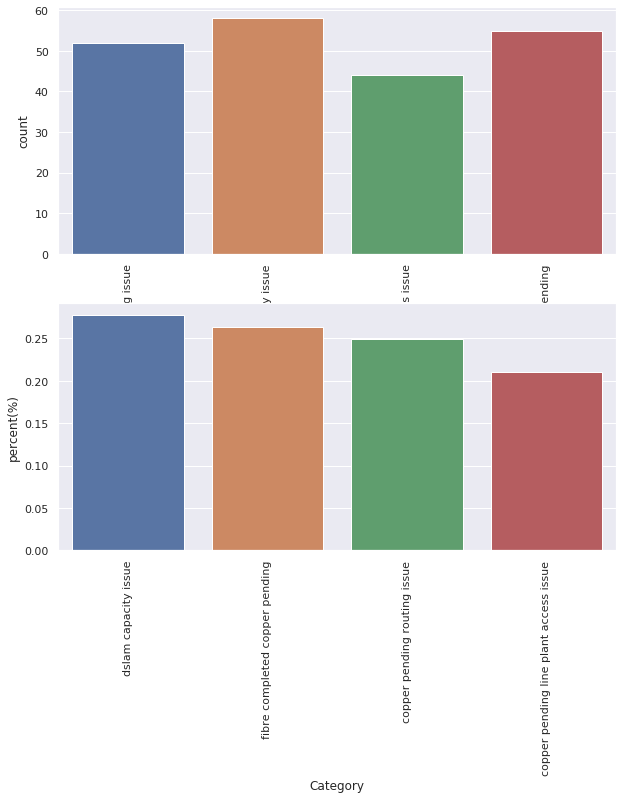

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ dslam capacity issue                   │     0.277512 │      58 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ fibre completed copper pending         │     0.263158 │      55 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │     0.248804 │      52 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │     0.210526 │      44 │
╘════╧════════════════════════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(train_div,'Category')

In [ ]:
train_div.head()

,Notes,Keywords/Phrases,Category
13,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
14,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
15,sync and dial tone proven through d slam and ...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
16,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
17,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue


In [ ]:
train_div = train_div.reset_index(drop=True)

In [ ]:
train_div.head()

,Notes,Keywords/Phrases,Category
0,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
1,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
2,sync and dial tone proven through d slam and ...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
3,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
4,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue


In [ ]:
val_div.shape

(142, 3)

In [ ]:
val_div.head()

,Notes,Keywords/Phrases,Category
6,ends pq passed fast test passed tfgh passed ci...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
7,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
8,tfgh mfl pc stcb jumpering or tie pair proble...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
9,upstreamspeed downstreamspeed tested notteste...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
10,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue


In [ ]:
val_div = val_div.reset_index(drop=True)

In [ ]:
val_total_4cat = val_div
val_total_4cat.shape

(142, 3)

In [ ]:
val_total_4cat = val_total_4cat.append(train_div_cat_mean_val)

In [ ]:
val_total_4cat.shape

(261, 3)

In [ ]:
val_total_4cat = val_total_4cat.reset_index(drop=True)

In [ ]:
val_total_4cat.tail()

,Notes,Keywords/Phrases,Category
256,upstreamspeed downstreamspeed tested notteste...,gea service test completed and no fault found,fibre completed copper pending
257,jumpered in stcb tfgh mfl ce start faulting a...,gea service test completed and no fault found,fibre completed copper pending
258,upstreamspeed downstreamspeed tested notteste...,gea service test completed and no fault found,fibre completed copper pending
259,ends fibre jumpering complete steps followed d...,gea service test completed and no fault found,fibre completed copper pending
260,upstreamspeed downstreamspeed tested notteste...,gea service test completed and no fault found,fibre completed copper pending


In [ ]:
val_total_4cat.head()

,Notes,Keywords/Phrases,Category
0,ends pq passed fast test passed tfgh passed ci...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
1,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
2,tfgh mfl pc stcb jumpering or tie pair proble...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
3,upstreamspeed downstreamspeed tested notteste...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
4,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue


In [ ]:
print('\nFrequency distribution of unique values => \n\n'+ str(val_total_4cat['Category'].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

fibre completed copper pending            194
dslam capacity issue                       25
copper pending routing issue               23
copper pending line plant access issue     19
Name: Category, dtype: int64


In [ ]:
print('\nFrequency distribution of unique values => \n\n'+ str(val_div['Category'].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

fibre completed copper pending            75
dslam capacity issue                      25
copper pending routing issue              23
copper pending line plant access issue    19
Name: Category, dtype: int64


In [ ]:
val_div.head()

,Notes,Keywords/Phrases,Category
0,ends pq passed fast test passed tfgh passed ci...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
1,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue
2,tfgh mfl pc stcb jumpering or tie pair proble...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
3,upstreamspeed downstreamspeed tested notteste...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
4,ends i cannot complete this task because the r...,routing provided is incorrect,copper pending routing issue


In [ ]:
val_div = val_div.reset_index(drop=True)

In [ ]:
val_div.shape

(142, 3)


Number of unique values => 4




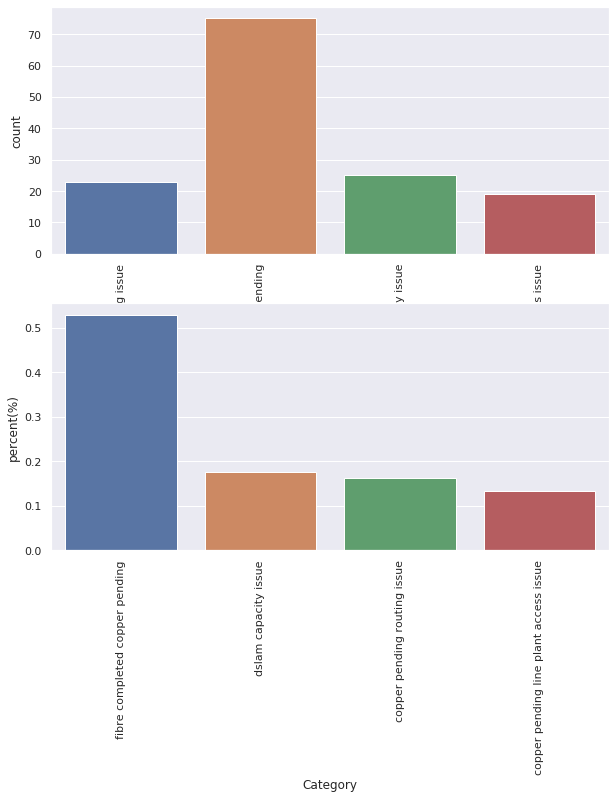

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ fibre completed copper pending         │     0.528169 │      75 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ dslam capacity issue                   │     0.176056 │      25 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │     0.161972 │      23 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │     0.133803 │      19 │
╘════╧════════════════════════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(val_div,'Category')


Number of unique values => 4




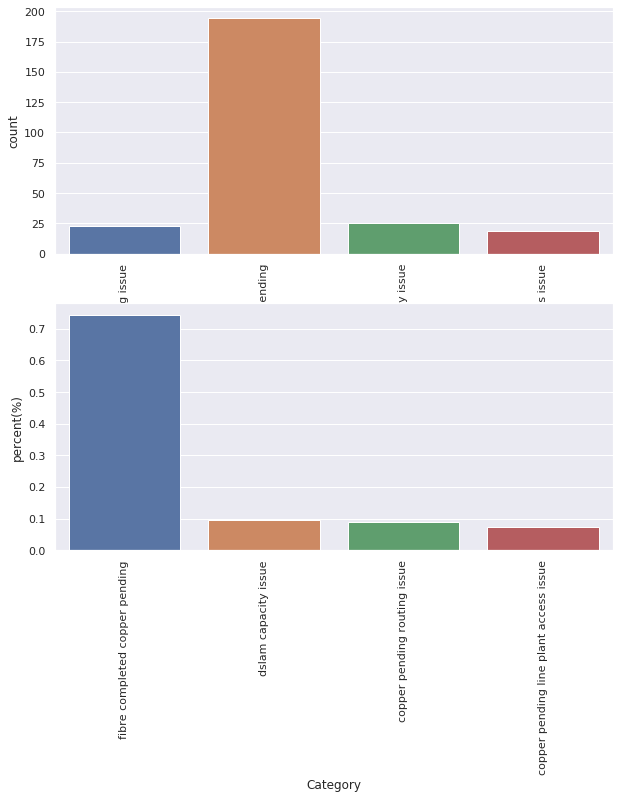

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ fibre completed copper pending         │    0.743295  │     194 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ dslam capacity issue                   │    0.0957854 │      25 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │    0.0881226 │      23 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │    0.0727969 │      19 │
╘════╧════════════════════════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(val_total_4cat,'Category')

# ***Category Prediction using Ktrain***

## Loading and preprocessing CSV file from drive

In [ ]:
data = train_div


Number of unique values => 4




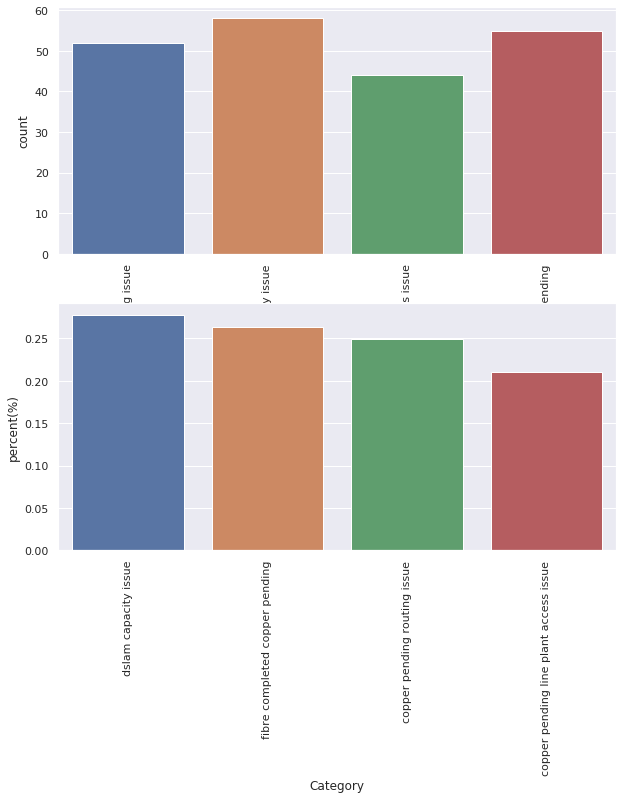

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ dslam capacity issue                   │     0.277512 │      58 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ fibre completed copper pending         │     0.263158 │      55 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │     0.248804 │      52 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │     0.210526 │      44 │
╘════╧════════════════════════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(data,'Category')

In [ ]:
data.shape

(209, 3)

In [ ]:
data.head()

,Notes,Keywords/Phrases,Category
0,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue
1,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue
2,sync dial tone proven slam jumpered per quoted...,stcb jumpering tie pair problem found stcb,copper pending routing issue
3,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue
4,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue


In [ ]:
data.tail()

,Notes,Keywords/Phrases,Category
204,ends cab jumpered per quoted routing sync mbs ...,dt present ft ok lt ok vdsl pass install sent ...,fibre completed copper pending
205,tfgh mfl ce start faulting end customer dp dis...,gea service test completed fault found,fibre completed copper pending
206,upstreamspeed downstreamspeed tested nottested...,gea service test completed fault found,fibre completed copper pending
207,end speed tfgh mfl ok gea service test complet...,gea service test completed fault found,fibre completed copper pending
208,ends fit complete access provide tagged side f...,gea service test completed fault found,fibre completed copper pending


### Cleaning the Sentence Column

In [ ]:
def cleaning(df,x):
    # removing of stopwords
    stop = stopwords.words('english')
    df[x] = df[x].apply(lambda t: " ".join(t for t in t.split() if t not in stop))


In [ ]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
cleaning(data,'Notes')
cleaning(data,'Keywords/Phrases')

In [ ]:
data.head()

,Notes,Keywords/Phrases,Category
0,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue
1,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue
2,sync dial tone proven slam jumpered per quoted...,stcb jumpering tie pair problem found stcb,copper pending routing issue
3,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue
4,ends cannot complete task routing provided inc...,routing provided incorrect,copper pending routing issue


In [ ]:
data.shape

(209, 3)

In [ ]:
dummies = pd.DataFrame()

In [ ]:
dummies = pd.get_dummies(data['Category'])

In [ ]:
dummies['Notes'] = data['Notes'].copy()
dummies['Keywords/Phrases'] = data['Keywords/Phrases'].copy()

In [ ]:
dummies['Sentences'] = dummies['Notes']+ " " + dummies['Keywords/Phrases']

In [ ]:
dummies.head()

,copper pending line plant access issue,copper pending routing issue,dslam capacity issue,fibre completed copper pending,Notes,Keywords/Phrases,Sentences
0,0,1,0,0,ends cannot complete task routing provided inc...,routing provided incorrect,ends cannot complete task routing provided inc...
1,0,1,0,0,ends cannot complete task routing provided inc...,routing provided incorrect,ends cannot complete task routing provided inc...
2,0,1,0,0,sync dial tone proven slam jumpered per quoted...,stcb jumpering tie pair problem found stcb,sync dial tone proven slam jumpered per quoted...
3,0,1,0,0,ends cannot complete task routing provided inc...,routing provided incorrect,ends cannot complete task routing provided inc...
4,0,1,0,0,ends cannot complete task routing provided inc...,routing provided incorrect,ends cannot complete task routing provided inc...


In [ ]:
dummies.tail()

,copper pending line plant access issue,copper pending routing issue,dslam capacity issue,fibre completed copper pending,Notes,Keywords/Phrases,Sentences
204,0,0,0,1,ends cab jumpered per quoted routing sync mbs ...,dt present ft ok lt ok vdsl pass install sent ...,ends cab jumpered per quoted routing sync mbs ...
205,0,0,0,1,tfgh mfl ce start faulting end customer dp dis...,gea service test completed fault found,tfgh mfl ce start faulting end customer dp dis...
206,0,0,0,1,upstreamspeed downstreamspeed tested nottested...,gea service test completed fault found,upstreamspeed downstreamspeed tested nottested...
207,0,0,0,1,end speed tfgh mfl ok gea service test complet...,gea service test completed fault found,end speed tfgh mfl ok gea service test complet...
208,0,0,0,1,ends fit complete access provide tagged side f...,gea service test completed fault found,ends fit complete access provide tagged side f...


In [ ]:
dummies.shape

(209, 7)

In [ ]:
from sklearn.utils import shuffle
dummies = shuffle(dummies)
dummies.reset_index(inplace=True, drop=True)

In [ ]:
dummies.head()

,copper pending line plant access issue,copper pending routing issue,dslam capacity issue,fibre completed copper pending,Notes,Keywords/Phrases,Sentences
0,0,0,0,1,synced mins tests ok e side circuit test resul...,gea service test completed fault found,synced mins tests ok e side circuit test resul...
1,1,0,0,0,ends photographic evidence available cannot co...,unable access companyname line plant located w...,ends photographic evidence available cannot co...
2,0,0,0,1,upstreamspeed downstreamspeed tested nottested...,gea service test completed fault found,upstreamspeed downstreamspeed tested nottested...
3,0,0,0,1,upstreamspeed downstreamspeed tested nottested...,gea service test completed fault found,upstreamspeed downstreamspeed tested nottested...
4,0,0,0,1,completed jumpering cab checked sync dial tone...,gea service test completed fault found,completed jumpering cab checked sync dial tone...


In [ ]:
dummies.tail()

,copper pending line plant access issue,copper pending routing issue,dslam capacity issue,fibre completed copper pending,Notes,Keywords/Phrases,Sentences
204,0,0,1,0,ends cannot complete task linked order delayed...,allocated ports unavailable faulty,ends cannot complete task linked order delayed...
205,1,0,0,0,ends photographic evidence available cannot co...,unable access companyname line plant located w...,ends photographic evidence available cannot co...
206,1,0,0,0,ends photographic evidence available cannot co...,unable access companyname line plant located w...,ends photographic evidence available cannot co...
207,0,1,0,0,ends customer survey available cannot complete...,routing provided incorrect,ends customer survey available cannot complete...
208,1,0,0,0,ends cannot complete task unable access compan...,unable access companyname line plant located w...,ends cannot complete task unable access compan...


In [ ]:
dummies.columns

Index(['copper pending line plant access issue',
       'copper pending routing issue', 'dslam capacity issue',
       'fibre completed copper pending', 'Notes', 'Keywords/Phrases',
       'Sentences'],
      dtype='object')

In [ ]:
dummies.shape

(209, 7)

In [ ]:
dummies.to_csv('/content/drive/My Drive/BTClassText/BTTraindiv_dummies_with_clean.csv',index = False)

In [ ]:
dummies.columns

Index(['copper pending line plant access issue',
       'copper pending routing issue', 'dslam capacity issue',
       'fibre completed copper pending', 'Notes', 'Keywords/Phrases',
       'Sentences'],
      dtype='object')

In [ ]:
val_div['Category'].unique()

array(['copper pending routing issue', 'fibre completed copper pending',
       'dslam capacity issue', 'copper pending line plant access issue'],
      dtype=object)

## Creating the Model

In [ ]:
DATA_PATH = '/content/drive/My Drive/BTClassText/BTTraindiv_dummies_with_clean.csv'
NUM_WORDS = 50000
MAXLEN = 400
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_csv(DATA_PATH,
                      'Sentences',
                      label_columns =['copper pending line plant access issue',
       'copper pending routing issue', 'dslam capacity issue',
       'fibre completed copper pending'],
                      val_filepath=None, 
                      max_features=NUM_WORDS, maxlen=MAXLEN,
                      ngram_range=2,
                      encoding= 'utf-8')

language: en
Word Counts: 829
Nrows: 188
188 train sequences
Average train sequence length: 52
Adding 2-gram features
max_features changed to 52779 with addition of ngrams
Average train sequence length with ngrams: 103
x_train shape: (188,400)
y_train shape: (188,4)
21 test sequences
Average test sequence length: 50
Average test sequence length with ngrams: 92
x_test shape: (21,400)
y_test shape: (21,4)


In [ ]:
model = text.text_classifier('fasttext', (x_train, y_train), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

Is Multi-Label? False
compiling word ID features...
maxlen is 400
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/50
188/188 [==============================] - 1s 5ms/step - loss: 1.9049 - acc: 0.2340
Epoch 2/50
188/188 [==============================] - 0s 514us/step - loss: 1.6324 - acc: 0.2926
Epoch 3/50
188/188 [==============================] - 0s 523us/step - loss: 1.9697 - acc: 0.2128
Epoch 4/50
188/188 [==============================] - 0s 490us/step - loss: 1.9578 - acc: 0.2340
Epoch 5/50
188/188 [==============================] - 0s 497us/step - loss: 1.7724 - acc: 0.2287
Epoch 6/50
188/188 [==============================] - 0s 470us/step - loss: 1.8880 - acc: 0.2181
Epoch 7/50
188/188 [==============================] - 0s 578us/step - loss: 1.8283 - acc: 0.2819
Epoch 8/50
188/188 [==============================] - 0s 531us/step - loss: 1.7312 - acc: 0.2872
Epoch 9/50
188/188 [==============================] - 0s 571us/step - loss: 1.8386 - acc: 0.2447
Epoch 10/50
188/188 [=========================

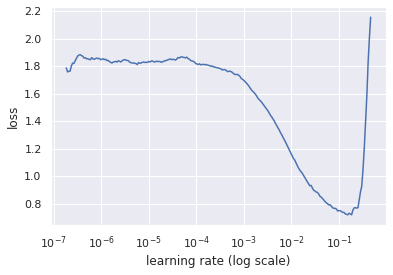

In [ ]:
learner.lr_find(max_epochs=50)
learner.lr_plot()

In [ ]:
learner.autofit(0.01)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Train on 188 samples, validate on 21 samples
Epoch 1/1024
188/188 [==============================] - 0s 2ms/step - loss: 1.7200 - acc: 0.2606 - val_loss: 1.3250 - val_acc: 0.2857
Epoch 2/1024
188/188 [==============================] - 0s 533us/step - loss: 1.4366 - acc: 0.3883 - val_loss: 1.2718 - val_acc: 0.5714
Epoch 3/1024
188/188 [==============================] - 0s 521us/step - loss: 0.8915 - acc: 0.6011 - val_loss: 1.2133 - val_acc: 0.5714
Epoch 4/1024
188/188 [==============================] - 0s 528us/step - loss: 0.6606 - acc: 0.7553 - val_loss: 1.1579 - val_acc: 0.5714
Epoch 5/1024
188/188 [==============================] - 0s 515us/step - loss: 0.4432 - acc: 0.8511 - val_loss: 1.0856 - val_acc: 0.6190
Epoch 6/1024
188/188 [==============================] - 0s 524us/step - loss: 0.4228 - acc: 0.

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
val_div['Category'][0:5]

0    copper pending routing issue
1    copper pending routing issue
2    copper pending routing issue
3    copper pending routing issue
4    copper pending routing issue
Name: Category, dtype: object

In [ ]:
val_div.shape[0]

142

In [ ]:
val_div['Category'][141]

'copper pending line plant access issue'

In [ ]:
ele0 = str(val_div['Notes'][0] + " " + val_div['Keywords/Phrases'][0])
ele1 = str(val_div['Notes'][1] + " " + val_div['Keywords/Phrases'][1])
ele2 = str(val_div['Notes'][2] + " " + val_div['Keywords/Phrases'][2])
ele3 = str(val_div['Notes'][3] + " " + val_div['Keywords/Phrases'][3])
ele4 = str(val_div['Notes'][4] + " " + val_div['Keywords/Phrases'][4])
ele141 = str(val_div['Notes'][141] + " " + val_div['Keywords/Phrases'][141])

In [ ]:
arr_test = [ele0,ele1,ele2,ele3,ele4,ele141]

In [ ]:
pred_test = predictor.predict(arr_test)

In [ ]:
pred_test

['copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending line plant access issue']

In [ ]:
true_val = val_div['Category'].to_list()

In [ ]:
true_val[0:15]

['copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue']

In [ ]:
def predict(df):
    arr = []
    predicted_val = []
    for i in range(df.shape[0]):
        arr.append(str(df['Notes'][i] + " " + df['Keywords/Phrases'][i]))
    predicted_val = predictor.predict(arr)
    return predicted_val

In [ ]:
predicted_val = predict(val_div)

In [ ]:
predicted_val

['copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'copper pending routing issue',
 'fibre completed copper pending',
 'fibre completed copper pending',
 'fibre completed copper pending',
 'fibre completed copper pending',
 'fibre completed copper pending',
 'fibre completed copper pending',
 'fibre completed copper pendin

In [ ]:
len(true_val),len(predicted_val)

(142, 142)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf = confusion_matrix(predicted_val,true_val)


Number of unique values => 4




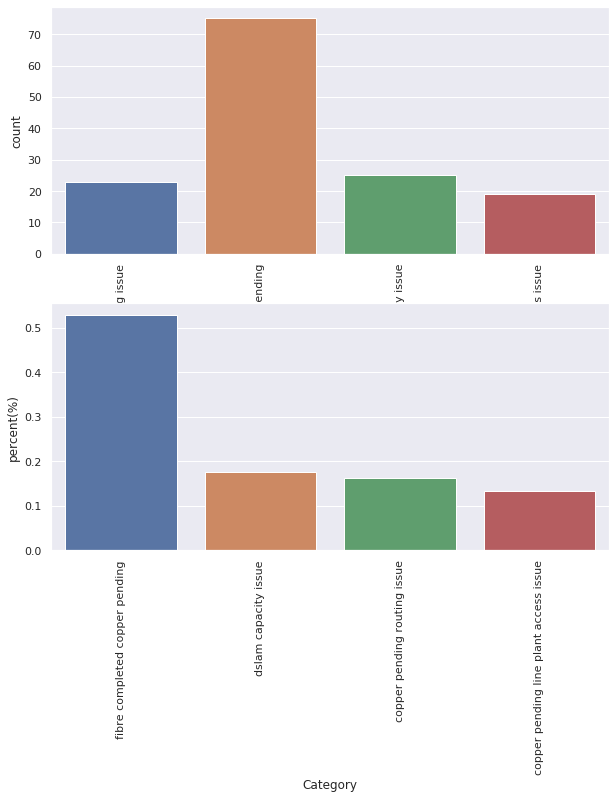

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ fibre completed copper pending         │     0.528169 │      75 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ dslam capacity issue                   │     0.176056 │      25 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │     0.161972 │      23 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │     0.133803 │      19 │
╘════╧════════════════════════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(val_div,'Category')

In [ ]:
conf

array([[19,  0,  0,  0],
       [ 0, 23,  0,  2],
       [ 0,  0, 24,  0],
       [ 0,  0,  1, 73]])

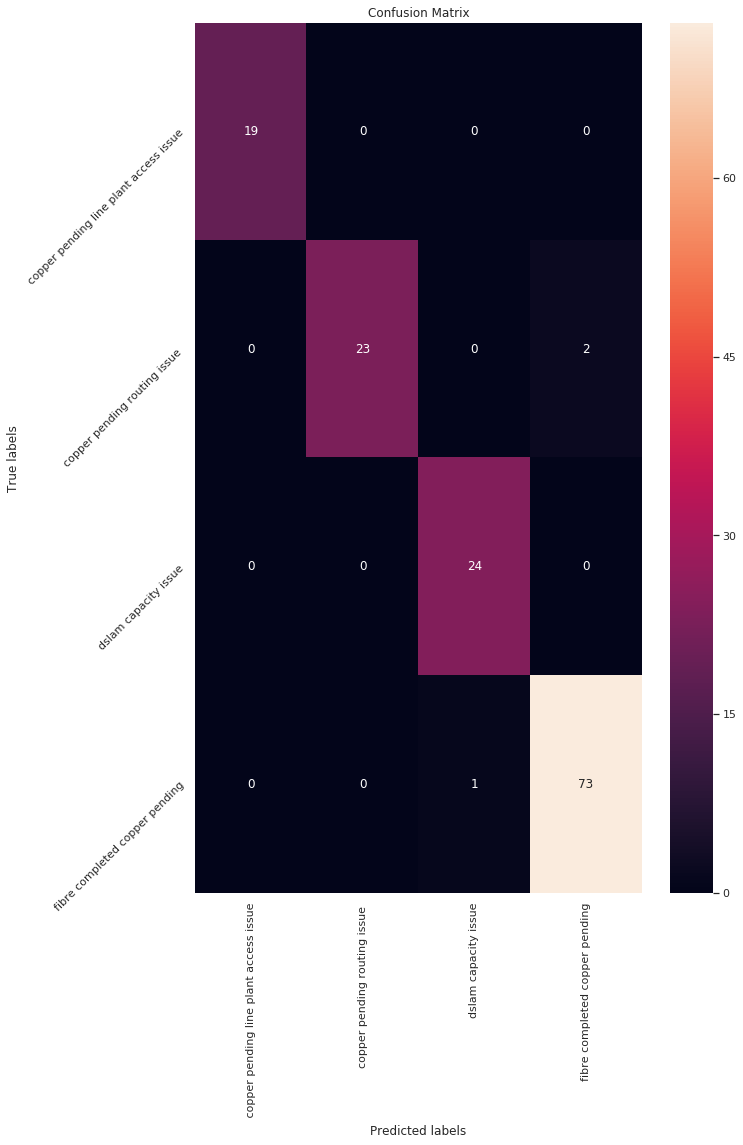

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     
plt.figure(figsize=(10, 16))
ax= plt.subplot()
sns.heatmap(conf, annot=True, ax = ax); #annot=True to annotate cells
plt.xticks(rotation=90)
plt.yticks(rotation=45)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(
    [' copper pending line plant access issue', 'copper pending routing issue ','dslam capacity issue','fibre completed copper pending']
    ); 
ax.yaxis.set_ticklabels([' copper pending line plant access issue', 'copper pending routing issue ','dslam capacity issue','fibre completed copper pending']);

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(true_val, predicted_val) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(true_val, predicted_val) )
print ('Report : ')
print (classification_report(true_val, predicted_val) )

Confusion Matrix :
[[19  0  0  0]
 [ 0 23  0  0]
 [ 0  0 24  1]
 [ 0  2  0 73]]
Accuracy Score : 0.9788732394366197
Report : 
                                        precision    recall  f1-score   support

copper pending line plant access issue       1.00      1.00      1.00        19
          copper pending routing issue       0.92      1.00      0.96        23
                  dslam capacity issue       1.00      0.96      0.98        25
        fibre completed copper pending       0.99      0.97      0.98        75

                              accuracy                           0.98       142
                             macro avg       0.98      0.98      0.98       142
                          weighted avg       0.98      0.98      0.98       142



## Saving the Model

In [ ]:
predictor.save('/content/drive/My Drive/BTClassText/model_v1')

In [ ]:
# Loading the model and assign it to the predictor
predictor = ktrain.load_predictor('/content/drive/My Drive/BTClassText/model_v1')

In [ ]:
train_div_cat_mean_val = train_div_cat_mean_val.reset_index(drop=True)

In [ ]:
train_div_cat_mean_val.shape,train_div_cat_mean_val.head(),train_div_cat_mean_val.tail()

((119, 3),
                                                Notes  ...                        Category
 0   sync and dial tone test at stcb comfirmed cop...  ...  fibre completed copper pending
 1   tfgh mfl ok gea service test completed and no...  ...  fibre completed copper pending
 2   upstreamspeed downstreamspeed tested notteste...  ...  fibre completed copper pending
 3   jumpered and synced ok at stcb on given fibre...  ...  fibre completed copper pending
 4   upstreamspeed downstreamspeed tested notteste...  ...  fibre completed copper pending
 
 [5 rows x 3 columns],
                                                  Notes  ...                        Category
 114   upstreamspeed downstreamspeed tested notteste...  ...  fibre completed copper pending
 115   jumpered in stcb tfgh mfl ce start faulting a...  ...  fibre completed copper pending
 116   upstreamspeed downstreamspeed tested notteste...  ...  fibre completed copper pending
 117  ends fibre jumpering complete steps foll

In [ ]:
predicted_val_train_div_part = predict(train_div_cat_mean_val)

In [ ]:
set(predicted_val_train_div_part)

{'copper pending routing issue', 'fibre completed copper pending'}

In [ ]:
actual_val_train_div_part = train_div_cat_mean_val['Category'].to_list()

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results2 = confusion_matrix(actual_val_train_div_part, predicted_val_train_div_part) 
print ('Confusion Matrix :')
print(results2) 
print ('Accuracy Score :',accuracy_score(actual_val_train_div_part, predicted_val_train_div_part) )
print ('Report : ')
print (classification_report(actual_val_train_div_part, predicted_val_train_div_part) )

Confusion Matrix :
[[  0   0]
 [  3 116]]
Accuracy Score : 0.9747899159663865
Report : 
                                precision    recall  f1-score   support

  copper pending routing issue       0.00      0.00      0.00         0
fibre completed copper pending       1.00      0.97      0.99       119

                      accuracy                           0.97       119
                     macro avg       0.50      0.49      0.49       119
                  weighted avg       1.00      0.97      0.99       119



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
val_total_4cat.shape,val_total_4cat.head(),val_total_4cat.tail()

((261, 3),
                                                Notes  ...                      Category
 0  ends pq passed fast test passed tfgh passed ci...  ...  copper pending routing issue
 1  ends i cannot complete this task because the r...  ...  copper pending routing issue
 2   tfgh mfl pc stcb jumpering or tie pair proble...  ...  copper pending routing issue
 3   upstreamspeed downstreamspeed tested notteste...  ...  copper pending routing issue
 4  ends i cannot complete this task because the r...  ...  copper pending routing issue
 
 [5 rows x 3 columns],
                                                  Notes  ...                        Category
 256   upstreamspeed downstreamspeed tested notteste...  ...  fibre completed copper pending
 257   jumpered in stcb tfgh mfl ce start faulting a...  ...  fibre completed copper pending
 258   upstreamspeed downstreamspeed tested notteste...  ...  fibre completed copper pending
 259  ends fibre jumpering complete steps followed d...  .

In [ ]:
predicted_val_total_4cat = predict(val_total_4cat)

In [ ]:
actual_val_total_div_part = val_total_4cat['Category'].to_list()


Number of unique values => 4




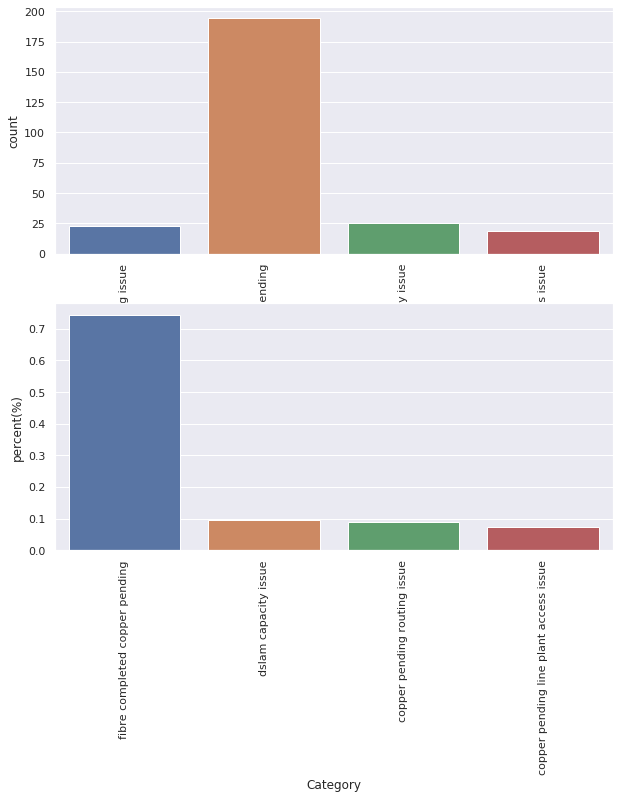

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ fibre completed copper pending         │    0.743295  │     194 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ dslam capacity issue                   │    0.0957854 │      25 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ copper pending routing issue           │    0.0881226 │      23 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │    0.0727969 │      19 │
╘════╧════════════════════════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(val_total_4cat,'Category')

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results3 = confusion_matrix(actual_val_total_div_part, predicted_val_total_4cat) 
print ('Confusion Matrix :')
print(results3) 
print ('Accuracy Score :',accuracy_score(actual_val_total_div_part, predicted_val_total_4cat) )
print ('Report : ')
print (classification_report(actual_val_total_div_part, predicted_val_total_4cat) )

Confusion Matrix :
[[ 19   0   0   0]
 [  0  23   0   0]
 [  0   0  24   1]
 [  0   5   0 189]]
Accuracy Score : 0.9770114942528736
Report : 
                                        precision    recall  f1-score   support

copper pending line plant access issue       1.00      1.00      1.00        19
          copper pending routing issue       0.82      1.00      0.90        23
                  dslam capacity issue       1.00      0.96      0.98        25
        fibre completed copper pending       0.99      0.97      0.98       194

                              accuracy                           0.98       261
                             macro avg       0.95      0.98      0.97       261
                          weighted avg       0.98      0.98      0.98       261



In [ ]:
uncleaned_df = pd.read_excel("/content/drive/My Drive/BTClassText/Notes for Analysis_v1.1.xlsx")

In [ ]:
uncleaned_df.shape

(703, 4)

In [ ]:
uncleaned_df.columns

Index(['New Order Ref.', 'Notes', 'Keywords/Phrases', 'Category'], dtype='object')

In [ ]:
un_df = pd.DataFrame()
un_df = uncleaned_df[['Notes', 'Keywords/Phrases', 'Category']]

In [ ]:
un_df.shape,un_df.columns,un_df.head()

((703, 3),
 Index(['Notes', 'Keywords/Phrases', 'Category'], dtype='object'),
                                                Notes  ...                            Category
 0  ends===\r\r\nAssociated CR55 with this job. Pl...  ...  Copper pending - Field work needed
 1  ends===\r\n\r\n\r\nAssociated CR55 with this j...  ...  Copper pending - Field work needed
 2  ends===\r\n\r\n\r\nAssociated CR55 with this j...  ...  Copper pending - Field work needed
 3  ends===\r\n\r\n\r\nAssociated CR55 with this j...  ...  Copper pending - Field work needed
 4  ends===\r\n\r\n\r\nAssociated CR55 with this j...  ...  Copper pending - Field work needed
 
 [5 rows x 3 columns])

In [ ]:
val_part.Category.unique()

NameError: ignored

In [ ]:
un_df.Category.unique()

array(['Copper pending - Field work needed',
       'Copper Pending - Routing issue',
       'Fibre completed, Copper pending',
       'Reappointment needed - Out of time', 'DSLAM Capacity issue',
       'Order Completed in field',
       'Copper pending - Line plant access issue', 'Fault in network',
       'Sales Query', 'Reappointment needed - EU not present',
       'Order Cancelled', 'Order completed in field',
       'Reappointment needed - New skills needed'], dtype=object)

In [ ]:
un_df = un_df.apply(lambda x: x.astype(str).str.lower())

In [ ]:
un_df.Category.unique()

array(['copper pending - field work needed',
       'copper pending - routing issue',
       'fibre completed, copper pending',
       'reappointment needed - out of time', 'dslam capacity issue',
       'order completed in field',
       'copper pending - line plant access issue', 'fault in network',
       'sales query', 'reappointment needed - eu not present',
       'order cancelled', 'reappointment needed - new skills needed'],
      dtype=object)

In [ ]:
import re
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
def makewordstring(s):
    s_words = (re.sub(r"[^a-zA-Z]"," ",s)).split(" ")
    s_words = listToString(s_words)
    s_words =  re.sub('[,\-/.!?]', ' ', s_words)
    s_words = re.sub('\W+',' ', s_words )
    return s_words

In [ ]:
un_df['Category'] = un_df['Category'].apply(makewordstring)

In [ ]:
un_df.Category.unique()

array(['copper pending field work needed', 'copper pending routing issue',
       'fibre completed copper pending',
       'reappointment needed out of time', 'dslam capacity issue',
       'order completed in field',
       'copper pending line plant access issue', 'fault in network',
       'sales query', 'reappointment needed eu not present',
       'order cancelled', 'reappointment needed new skills needed'],
      dtype=object)

In [ ]:
drop_cat = ['copper pending field work needed','reappointment needed eu not present','reappointment needed new skills needed','order cancelled','reappointment needed out of time','sales query','order completed in field','fault in network']

In [ ]:
un_df = un_df[~un_df.Category.isin(drop_cat)]

In [ ]:
un_df = un_df.reset_index(drop=True)

In [ ]:
un_df.shape,un_df.head(),un_df.tail()

((593, 3),
                                                Notes  ...                        Category
 0  600;connected fibre in cab no dside due to no ...  ...    copper pending routing issue
 1  \n 08:52          ogecr55000042    /     mfl=o...  ...  fibre completed copper pending
 2  600;upstreamspeed:10,downstreamspeed:40,tested...  ...  fibre completed copper pending
 3  600;synced for 3 mins tests ok e side 92\r\n\r...  ...  fibre completed copper pending
 4  600;upstreamspeed:20,downstreamspeed:80,tested...  ...  fibre completed copper pending
 
 [5 rows x 3 columns],
                                                  Notes  ...                        Category
 588  ends===\r\n\r\n\r\n\r\n\r\n\r\ni cannot comple...  ...    copper pending routing issue
 589  ends===\r\n\r\n\r\n\r\n\r\n\r\ni cannot comple...  ...    copper pending routing issue
 590  600; 08:21          tfgh61706078   mfl=ok     ...  ...  fibre completed copper pending
 591  600;upstreamspeed:20,downstreamspeed:80,

In [ ]:
un_df.head()

,Notes,Keywords/Phrases,Category
0,600;connected fibre in cab no dside due to no ...,stcb jumpering or tie pair problem found in th...,copper pending routing issue
1,\n 08:52 ogecr55000042 / mfl=o...,gea service test completed and no fault found,fibre completed copper pending
2,"600;upstreamspeed:10,downstreamspeed:40,tested...",gea service test completed and no fault found,fibre completed copper pending
3,600;synced for 3 mins tests ok e side 92\r\n\r...,gea service test completed and no fault found,fibre completed copper pending
4,"600;upstreamspeed:20,downstreamspeed:80,tested...",gea service test completed and no fault found,fibre completed copper pending


In [ ]:
un_df['Sentences'] = un_df['Notes'] + " " + un_df['Keywords/Phrases']

In [ ]:
un_df.columns

Index(['Notes', 'Keywords/Phrases', 'Category', 'Sentences'], dtype='object')

In [ ]:
predicted_val_un = predict(un_df)

In [ ]:
type(predicted_val_un)

list

In [ ]:
un_df['Predicted_Category'] = predicted_val_un

In [ ]:
un_df.head()

,Notes,Keywords/Phrases,Category,Sentences,Predicted_Category
0,600;connected fibre in cab no dside due to no ...,stcb jumpering or tie pair problem found in th...,copper pending routing issue,600;connected fibre in cab no dside due to no ...,copper pending routing issue
1,\n 08:52 ogecr55000042 / mfl=o...,gea service test completed and no fault found,fibre completed copper pending,\n 08:52 ogecr55000042 / mfl=o...,fibre completed copper pending
2,"600;upstreamspeed:10,downstreamspeed:40,tested...",gea service test completed and no fault found,fibre completed copper pending,"600;upstreamspeed:10,downstreamspeed:40,tested...",fibre completed copper pending
3,600;synced for 3 mins tests ok e side 92\r\n\r...,gea service test completed and no fault found,fibre completed copper pending,600;synced for 3 mins tests ok e side 92\r\n\r...,fibre completed copper pending
4,"600;upstreamspeed:20,downstreamspeed:80,tested...",gea service test completed and no fault found,fibre completed copper pending,"600;upstreamspeed:20,downstreamspeed:80,tested...",fibre completed copper pending


In [ ]:
un_df.to_excel("/content/drive/My Drive/BTClassText/BT_Data_Testing.xlsx",index=False)

In [ ]:
un_df.shape

(593, 5)

In [ ]:
actual_val_un =  un_df['Category'].to_list()


Number of unique values => 4




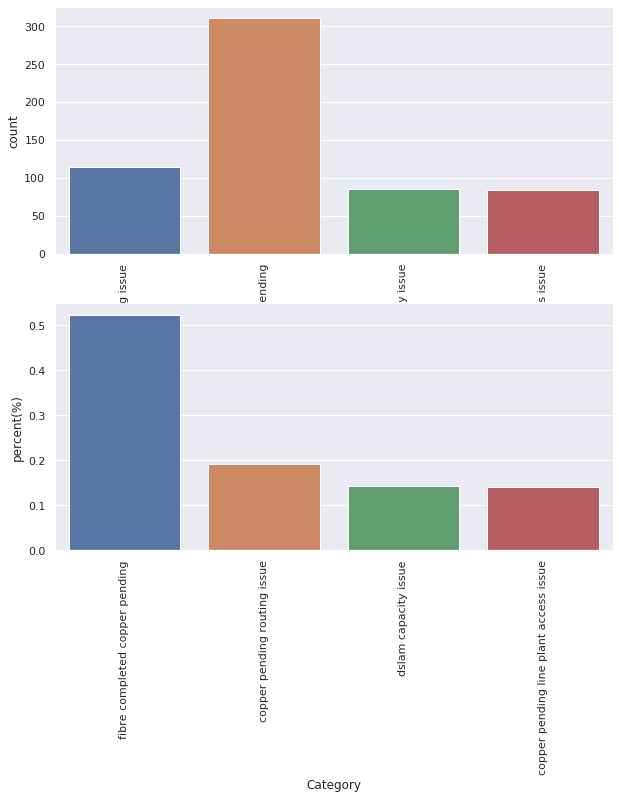

╒════╤════════════════════════════════════════╤══════════════╤═════════╕
│    │ Category                               │   percent(%) │   count │
╞════╪════════════════════════════════════════╪══════════════╪═════════╡
│  0 │ fibre completed copper pending         │     0.522766 │     310 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  1 │ copper pending routing issue           │     0.192243 │     114 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  2 │ dslam capacity issue                   │     0.143339 │      85 │
├────┼────────────────────────────────────────┼──────────────┼─────────┤
│  3 │ copper pending line plant access issue │     0.141653 │      84 │
╘════╧════════════════════════════════════════╧══════════════╧═════════╛


In [ ]:
univariate_categorical(un_df,'Category')

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results4 = confusion_matrix(actual_val_un, predicted_val_un) 
print ('Confusion Matrix :')
print(results4) 
print ('Accuracy Score :',accuracy_score(actual_val_un, predicted_val_un) )
print ('Report : ')
print (classification_report(actual_val_un, predicted_val_un) )

Confusion Matrix :
[[ 84   0   0   0]
 [  0 114   0   0]
 [  0   0  84   1]
 [  0   7   1 302]]
Accuracy Score : 0.984822934232715
Report : 
                                        precision    recall  f1-score   support

copper pending line plant access issue       1.00      1.00      1.00        84
          copper pending routing issue       0.94      1.00      0.97       114
                  dslam capacity issue       0.99      0.99      0.99        85
        fibre completed copper pending       1.00      0.97      0.99       310

                              accuracy                           0.98       593
                             macro avg       0.98      0.99      0.99       593
                          weighted avg       0.99      0.98      0.98       593



In [ ]:
un_df

,Notes,Keywords/Phrases,Category,Sentences,Predicted_Category
0,600;connected fibre in cab no dside due to no ...,stcb jumpering or tie pair problem found in th...,copper pending routing issue,600;connected fibre in cab no dside due to no ...,copper pending routing issue
1,\n 08:52 ogecr55000042 / mfl=o...,gea service test completed and no fault found,fibre completed copper pending,\n 08:52 ogecr55000042 / mfl=o...,fibre completed copper pending
2,"600;upstreamspeed:10,downstreamspeed:40,tested...",gea service test completed and no fault found,fibre completed copper pending,"600;upstreamspeed:10,downstreamspeed:40,tested...",fibre completed copper pending
3,600;synced for 3 mins tests ok e side 92\r\n\r...,gea service test completed and no fault found,fibre completed copper pending,600;synced for 3 mins tests ok e side 92\r\n\r...,fibre completed copper pending
4,"600;upstreamspeed:20,downstreamspeed:80,tested...",gea service test completed and no fault found,fibre completed copper pending,"600;upstreamspeed:20,downstreamspeed:80,tested...",fibre completed copper pending
5,600;all stcb jumper comp dial tone and sync co...,gea service test completed and no fault found,fibre completed copper pending,600;all stcb jumper comp dial tone and sync co...,fibre completed copper pending
6,600;sync and dial tone proven through d slam a...,stcb jumpering or tie pair problem found in th...,copper pending routing issue,600;sync and dial tone proven through d slam a...,copper pending routing issue
7,***end*** 11:16 tfgh57760748 / mf...,gea service test completed and no fault found,fibre completed copper pending,***end*** 11:16 tfgh57760748 / mf...,fibre completed copper pending
8,ends===\r\n\r\n\r\n\r\n\r\n\r\ni cannot comple...,the allocated ports are unavailable or faulty,dslam capacity issue,ends===\r\n\r\n\r\n\r\n\r\n\r\ni cannot comple...,dslam capacity issue
9,ends===\r\n\r\n\r\n\r\n\r\n\r\ni cannot comple...,the allocated ports are unavailable or faulty,dslam capacity issue,ends===\r\n\r\n\r\n\r\n\r\n\r\ni cannot comple...,dslam capacity issue


In [ ]:
excel_result = un_df[['Notes','Keywords/Phrases','Category','Predicted_Category']]

In [ ]:
excel_result.shape

(593, 4)

In [ ]:
excel_result[excel_result['Category']!=excel_result['Predicted_Category']]

,Notes,Keywords/Phrases,Category,Predicted_Category
115,600;copper side of job not complete but all pu...,"copper side of job not complete ,stcb jumperin...",fibre completed copper pending,copper pending routing issue
218,600;stcb jumpering completed. \r\n\r\ncircuit ...,gea service test completed and no fault found,fibre completed copper pending,copper pending routing issue
283,600; 17:58 tfgh61897216 / mfl=...,"test was saying no speeds,gea service test com...",dslam capacity issue,fibre completed copper pending
425,ends===\r\n\r\n\r\n\r\n\r\ncab jumpered as per...,"dt present, ft ok, lt ok, vdsl pass, \ninstall...",fibre completed copper pending,dslam capacity issue
457,600;1st\r\n 09:09 tfgh59863836 / ...,gea service test completed and no fault found,fibre completed copper pending,copper pending routing issue
472,600; first test \r\n13:30 tfgh6057257...,gea service test completed and no fault found,fibre completed copper pending,copper pending routing issue
538,600;1st\r\n 07:39 tfgh61404604 / ...,gea service test completed and no fault found,fibre completed copper pending,copper pending routing issue
553,600;copper to fibre upgraded. \r\n\r\ncircuit ...,gea service test completed and no fault found,fibre completed copper pending,copper pending routing issue
573,600;awaiting completion of copper provide\r\n ...,gea service test completed and no fault found,fibre completed copper pending,copper pending routing issue


In [ ]:
(593-9)/593

0.984822934232715

In [ ]:
excel_result.to_excel("/content/drive/My Drive/BTClassText/BT_Data_Testing_Result.xlsx",index=False)